In [8]:
import numpy as np
import tensorflow as tf
import keras
import io
import binvox_rw
import zipfile
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
with zipfile.ZipFile('models/models-binvox-solid.zip','r') as zip_ref:
    zip_ref.extractall('models/models-binvox-solid')
with zipfile.ZipFile('models/models-screenshots.zip','r') as zip_ref:
    zip_ref.extractall('models/screenshots')    

In [17]:
imgs = Path("models/screenshots/screenshots")
voxels = Path("models/models-binvox-solid/models-binvox-solid")
fimgs = [f for f in imgs.iterdir() if f.is_dir()]
fvoxels = [f for f in voxels.iterdir() if f.is_file()]
g = [0, 1, 6, 7]

[WindowsPath('models/models-binvox-solid/models-binvox-solid/100f39dce7690f59efb94709f30ce0d2.binvox'), WindowsPath('models/models-binvox-solid/models-binvox-solid/101354f9d8dede686f7b08d9de913afe.binvox'), WindowsPath('models/models-binvox-solid/models-binvox-solid/1018f01d42ae7fad52249d8432f6087e.binvox'), WindowsPath('models/models-binvox-solid/models-binvox-solid/102273fdf8d1b90041fbc1e2da054acb.binvox'), WindowsPath('models/models-binvox-solid/models-binvox-solid/1022fe7dd03f6a4d4d5ad9f13ac9f4e7.binvox'), WindowsPath('models/models-binvox-solid/models-binvox-solid/1028b32dc1873c2afe26a3ac360dbd4.binvox'), WindowsPath('models/models-binvox-solid/models-binvox-solid/1029fd5d71a06ea32ea98d69e91ba870.binvox'), WindowsPath('models/models-binvox-solid/models-binvox-solid/102a6b7809f4e51813842bc8ef6fe18.binvox'), WindowsPath('models/models-binvox-solid/models-binvox-solid/102ea1d8d5fe24e8485059ffe7a2f9c7.binvox'), WindowsPath('models/models-binvox-solid/models-binvox-solid/1033ee86cc8bac

In [18]:
# To remove the binvoxel files which do not have corresponding images
for i in range(len(fvoxels)):
    with open(str(fvoxels[i]), 'rb') as f:
        model = binvox_rw.read_as_3d_array(f)
    if np.sum(model.data) == 0:
        fvoxels[i].unlink()
        fvoxels.pop(i)
        if i <= len(fimgs):
            fimgs.pop(i)
    if i <= len(fimgs):
        while not fvoxels[i].stem == fimgs[i].stem:
            fvoxels[i].unlink()
            fvoxels.pop(i)
    else:
        fvoxels[i].unlink()
        fvoxels.pop(i)

IndexError: list index out of range

In [22]:
# To create 4 new folders, one for each view
for i in range(4):
    Path(f"models/screenshots/view{i}").mkdir(exist_ok=True)
    Path(f"models/screenshots/view{i}/data").mkdir(exist_ok=True)

In [26]:
# To seperate each view of a model into it's corresponding image
for j in range(len(fimgs)):    
    img_files = [f for f in fimgs[j].iterdir() if f.is_file]
    if len(img_files)==15:
        for k in range(4):
            pieces = img_files[g[k]].parts
            img_files[g[k]].rename(Path(f"{pieces[0]}/{pieces[1]}/view{k}/data/{pieces[4]}"))

In [25]:
print(img_files[0].parts)

('models', 'screenshots', 'screenshots', '1004f30be305f33d28a1548e344f0e2e', '1004f30be305f33d28a1548e344f0e2e-0.png')


In [28]:
gen = ImageDataGenerator(rescale=1/255.)
view0 = gen.flow_from_directory(
    "models/screenshots/view0",
    target_size=(512, 512),
    seed=1,
    class_mode=None)

view1 = gen.flow_from_directory(
    "models/screenshots/view1",
    target_size=(512, 512),
    seed=1,
    class_mode=None)

view2 = gen.flow_from_directory(
    "models/screenshots/view2",
    target_size=(512, 512),
    seed=1,
    class_mode=None)

view3 = gen.flow_from_directory(
    "models/screenshots/view3",
    target_size=(512, 512),
    seed=1,
    class_mode=None)

Found 12288 images belonging to 1 classes.
Found 12288 images belonging to 1 classes.
Found 12288 images belonging to 1 classes.
Found 12288 images belonging to 1 classes.


In [29]:
def customGenerator(gen1,gen2,gen3,gen4,gen5):
    while True:
        for (x1,y1),(x2,y2),(x3,y3),(x4,y4),(x5,y5) in zip(gen1,gen2,gen3,gen4,gen5):
            yield ([x1,x2,x3,x4],x5)

<class 'numpy.ndarray'>
(512, 512, 3) (512, 512, 3)


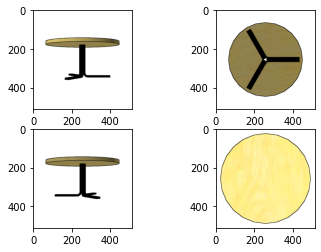

<class 'numpy.ndarray'>
(512, 512, 3) (512, 512, 3)


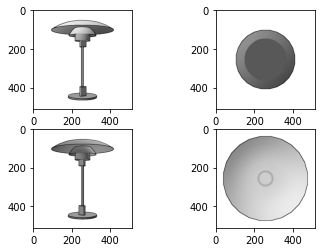

<class 'numpy.ndarray'>
(512, 512, 3) (512, 512, 3)


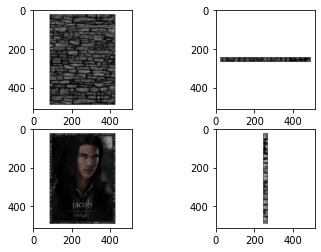

In [30]:
count = 0
for i,j,k,l in zip(view0, view1, view2, view3):
    count += 1
    if count<4:
        print(type(i[1]))
        print(np.squeeze(i[0]).shape, i[1].shape)
        fig, axs = plt.subplots(2, 2)
        axs[0, 0].imshow(i[0])
        axs[1, 0].imshow(j[0])
        axs[0, 1].imshow(k[0])
        axs[1, 1].imshow(l[0])
        plt.show()
    else:
        break

In [14]:
with open(str(fvoxels[0]), 'rb') as f:
    model = binvox_rw.read_as_3d_array(f)

In [15]:
np.sum(model.data)

0

In [8]:
128**3

2097152